In [1]:
#General imports.

%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
import matplotlib 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
def setint():
    mpld3.enable_notebook()
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10)
def noint():
    mpld3.disable_notebook()
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)


import ROOT as r
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import csv
import pandas

#import seaborn as sns
#sns.set(style="ticks", color_codes=True)
import numpy as np
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

plt.rcParams['figure.facecolor'] = 'white'

def toast(text):
    if(len(str(text)) > 100):
        text = str(text)[:100]+" ..."
        print(text)
    status = os.system("powershell.exe -Command 'New-BurntToastNotification -Text \""+str(text)+"\"'")
    if(status == 0):
        print("Toast Notification Sent")
    else:
        print("ERROR: Unable to send toast with message ", text)

noint()

Welcome to JupyROOT 6.12/06


In [2]:
def Npos(y,x):
    return 1-2*y**3 + y**4 + math.cos(x)/3 + 2./3. * y**3 * math.cos(x) - y**4 * math.cos(x)

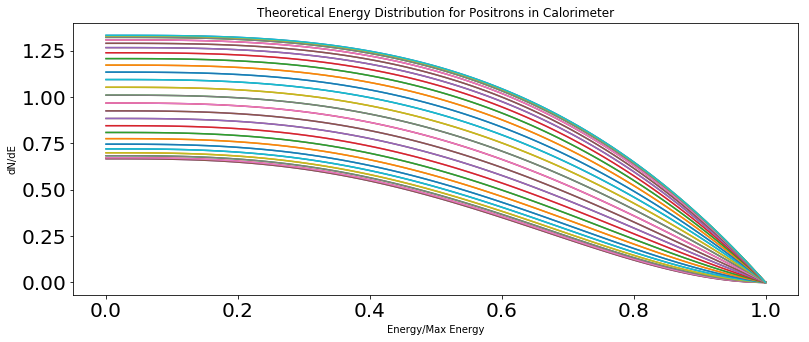

In [3]:
noint()
fig,ax = plt.subplots(figsize=(13,5))
plt.title("Theoretical Energy Distribution for Positrons in Calorimeter")
plt.xlabel("Energy/Max Energy")
plt.ylabel(r"dN/dE")
points = np.linspace(0,1,100)
for x in np.linspace(0,2*math.pi,50):
    plt.plot(points, [Npos(y,x) for y in points], label=r"$\alpha$ = "+str(round(x,3)))
    
#plt.legend()
plt.show()

In [4]:
kshist = r.TH1D("kshist","kshist",1000,0,1)
ks_ref = r.TH1D("ks_ref","ref",1000,0,1)

In [5]:
for i in range(1000):
    ks_ref.SetBinContent(i,Npos(i/1000., math.pi/2))

In [6]:
for i in range(1000):
    kshist.SetBinContent(i,Npos(i/1000., math.pi))

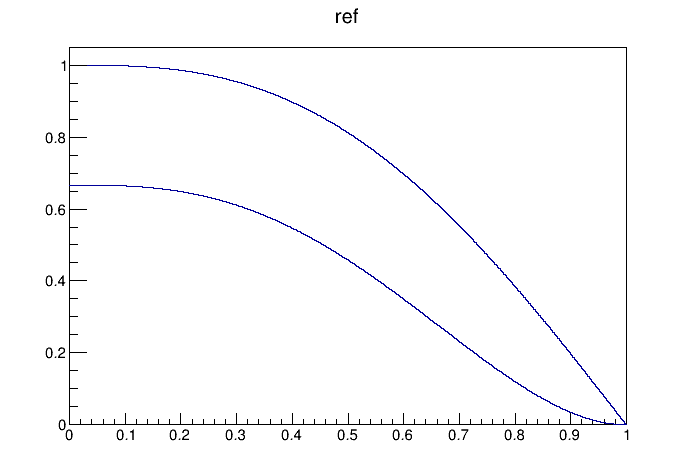

In [7]:
c = r.TCanvas()
ks_ref.Draw()
kshist.Draw("SAME")
c.Draw()

In [8]:
ks_ref.KolmogorovTest(kshist,"M")

0.08197684304255559

---
### Lets put this into a loop

In [18]:
ksmin = 0
ksmax = 1
ksbins = 1000

In [19]:
kshist = r.TH1D("kshist","kshist",ksbins,ksmin,ksmax)
ks_ref = r.TH1D("ks_ref","ref",ksbins,ksmin,ksmax)

Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ks_ref (Potential memory leak).


In [20]:
for i in range(ksbins):
    ks_ref.SetBinContent(i,Npos(ks_ref.GetBinCenter(i), math.pi/2))

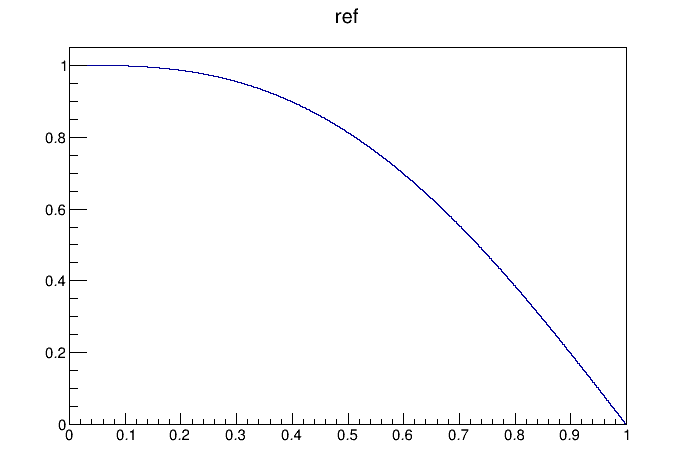

In [21]:
c= r.TCanvas()
ks_ref.Draw()
c.Draw()

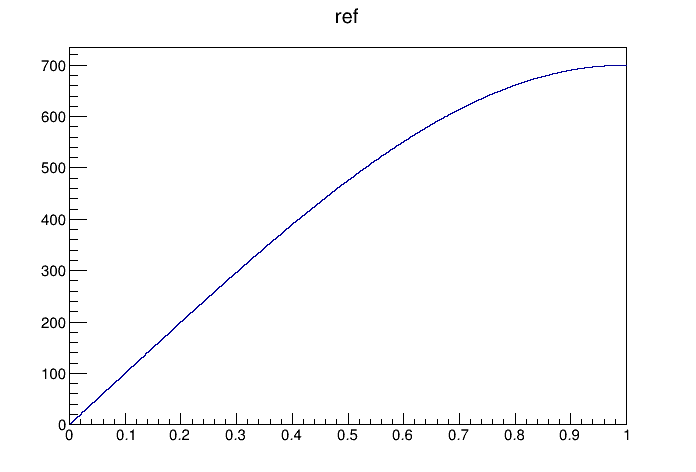

In [22]:
ks_ref_cum = ks_ref.GetCumulative()
ks_ref_scaled = ks_ref.Clone()
ks_ref_scaled.Scale(1/(ks_ref_scaled.GetEntries()))
c= r.TCanvas()
ks_ref_cum.Draw()
c.Draw()

In [37]:
ksvec = []

npoints = 10
nrevs = 10

for h in np.linspace(0,nrevs*math.pi,npoints):
    try:
        kshist.Delete()
    except:
        pass
    
    kshist = r.TH1D("kshist","kshist",ksbins,ksmin,ksmax)
    for i in range(ksbins):
        kshist.SetBinContent(i,Npos(kshist.GetBinCenter(i),h))
    #kshist.Scale(1/(kshist.Integral()))
        
    kshist_cum = kshist.GetCumulative()  
    ksvec.append( ks_ref.KolmogorovTest(kshist,"M") )
    
    ksdiff = kshist.Clone()
    ksdiff.Scale(1/(ksdiff.GetEntries()))
    
    ksdiff.Add(ks_ref_scaled,-1)
    
    #c = r.TCanvas("c","c",400,400)
    #ks_ref.GetXaxis().SetRangeUser(0,1)
    #ks_ref.Draw()
    #kshist.SetLineColor(2)
    #kshist.Draw("SAME")
    #c.Draw()
    #c.Print("./images/ks_"+str(h).zfill(h)+".png")

Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: kshist (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


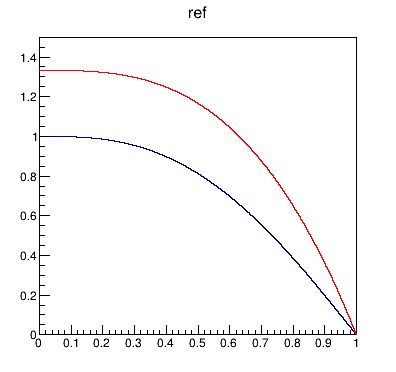

In [38]:
c = r.TCanvas("c","c",400,400)
ks_ref.GetXaxis().SetRangeUser(0,1)
ks_ref.GetYaxis().SetRangeUser(0,1.5)
ks_ref.Draw()
kshist.SetLineColor(2)
kshist.Draw("SAME")
c.Draw()
#c.Print("./images/ks_"+str(h).zfill(5)+".png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


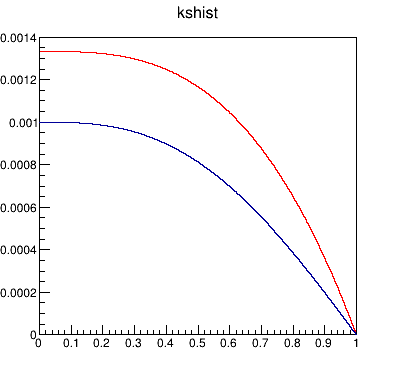

In [39]:
c = r.TCanvas("c","c",400,400)
ks_ref_scaled.Draw("hist")
kshist.Scale(1/kshist.GetEntries())
kshist.Draw("hist")
ks_ref_scaled.Draw("hist same")

c.Draw()
#c.Print("./images/ks_"+str(h).zfill(5)+".png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


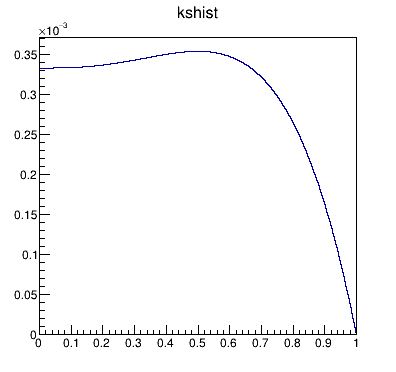

In [40]:
c = r.TCanvas("c","c",400,400)
ksdiff.Draw("hist")
c.Draw()
#c.Print("./images/ks_"+str(h).zfill(5)+".png")

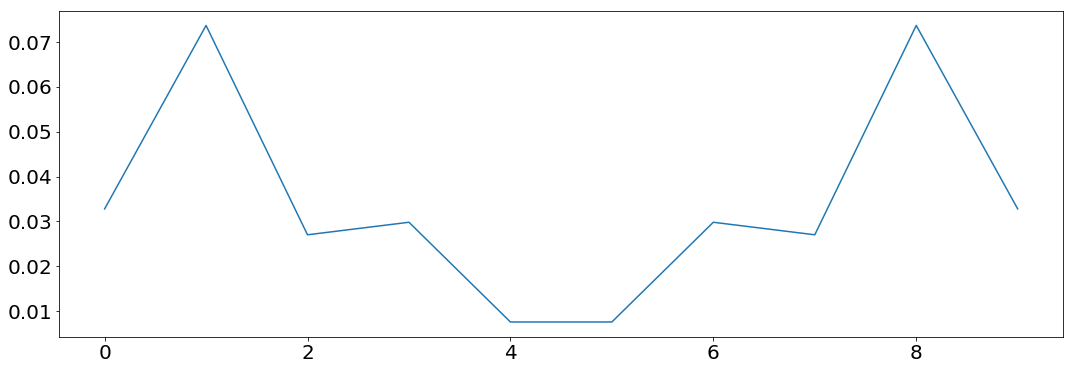

In [41]:
fig,ax = plt.subplots(figsize=(18,6))
plt.plot(ksvec)
plt.show()

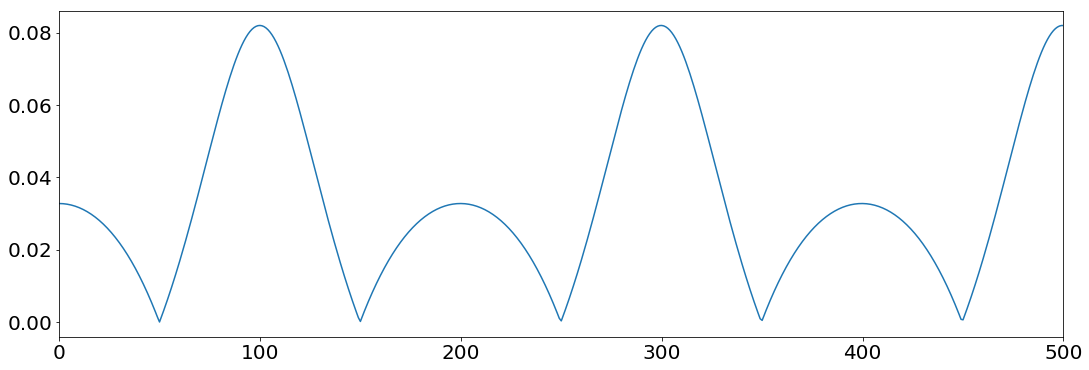

In [17]:
fig,ax = plt.subplots(figsize=(18,6))
plt.plot(ksvec)
plt.xlim(0,500)
plt.show()

In [18]:
npoints = len(ksvec)
ks_result = r.TH1D("ks_result","ks_result",npoints,0,npoints)
for i in range(npoints):
    ks_result.SetBinContent(i, ksvec[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


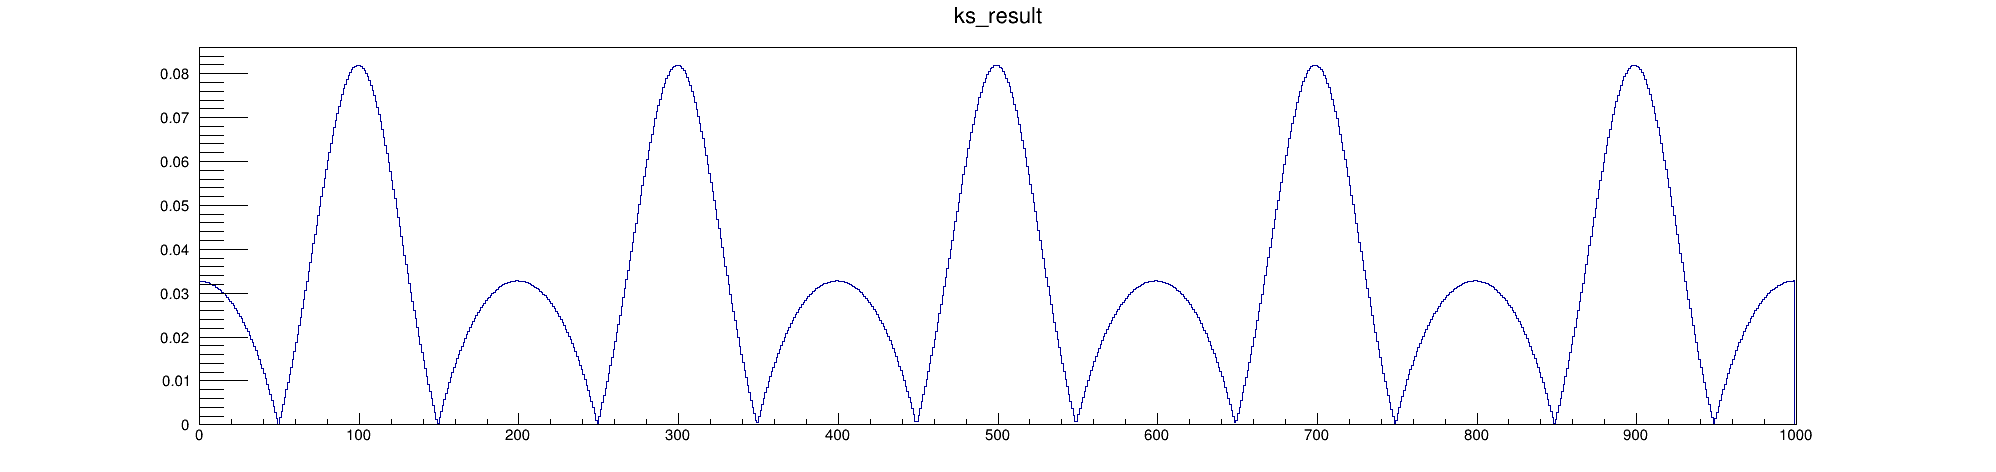

In [19]:
c = r.TCanvas("c","c",2000,500)
ks_result.Draw()
c.Draw()

In [20]:
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def peak_fit_sine(x, p):
    #R = p[1]
    #omega = getBlinded.paramToFreq(R)
    return p[0]*r.TMath.Abs(r.TMath.Sin(omega*x[0] + p[2])) + p[3]

def peak_fit_sine_2(x, p):
    #R = p[1]
    #omega = getBlinded.paramToFreq(R)
    return p[0]*r.TMath.Abs(r.TMath.Sin(p[1]*x[0] + p[2])) + p[3] +p[4]*r.TMath.Sin(p[1]*x[0] + p[2])

func1 = r.TF1("simplesine", peak_fit_sine, 0,2000,4)
func1.SetParNames('A','R','#phi','+ C')
func1.SetParameters(0.03,0,0,0.002)
func1.SetParLimits(0,0.02,100)
func1.SetLineColor(2)
func1.SetNpx(5000)

func2 = r.TF1("complexsine", peak_fit_sine_2, 0,len(ksvec),5)
func2.SetParNames('A_{1}','#omega','#phi_{1}','+ C', 'A_{2}', '#phi_{2}')
func2.SetParameters(0.03,1,1,1,1,1)
func2.SetParLimits(0,0.02,100)
func2.SetLineColor(3)
func2.SetNpx(5000)

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [21]:
def peak_fit_sine_3(x, p):
    return (( p[0] + p[4]*r.TMath.Sin(p[1]*x[0] + p[2]) )*r.TMath.Abs(r.TMath.Sin(p[1]*x[0] + p[2])) 
            + p[3] + p[11]*r.TMath.Sin(p[1]*x[0] + p[2])
            + (( p[5] + p[6]*r.TMath.Sin(p[1]*x[0] + p[2]) )*r.TMath.Abs(r.TMath.Sin(p[1]*x[0] + p[2])))**2
            + (( p[7] + p[8]*r.TMath.Sin(p[1]*x[0] + p[2]) )*r.TMath.Abs(r.TMath.Sin(p[1]*x[0] + p[2])))**3
            + (( p[9] + p[10]*r.TMath.Sin(p[1]*x[0] + p[2]) )*r.TMath.Abs(r.TMath.Sin(p[1]*x[0] + p[2])))**4
            #+ (( p[11] + p[12]*r.TMath.Sin(p[1]*x[0] + p[2]) )*r.TMath.Abs(r.TMath.Sin(p[1]*x[0] + p[2])))**5
            + p[12]*r.TMath.Sin(p[13]*p[1]*x[0] + p[14])
           ) 

func4 = r.TF1("sinsquare", peak_fit_sine_3, 0,5000,15)
func4.SetParNames('A_{1a}','#omega','#phi_{1}','A_{0a}', 'A_{1b}', 'A_{2a}', 
                  'A_{2b}', 'A_{3a}', 'A_{3b}', 'A_{4a}', 'A_{4b}')
func4.SetParName(11, 'A_{0b}')
func4.SetParName(12, 'A_{5b}')
func4.SetParName(12, 'A_{Resid-a}')
func4.SetParName(13, 'N_{#omega-a}')
func4.SetParName(14, 'N_{#phi-a}')
func4.SetParameters(0.03,1,1,1,1,1)
func4.SetParameter(13,6)
func4.SetParameter(14,0)
func4.SetParameter(12,0.00001)
#func4.SetParLimits(0,0.02,100)
func4.SetLineColor(6)
func4.SetNpx(1000)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


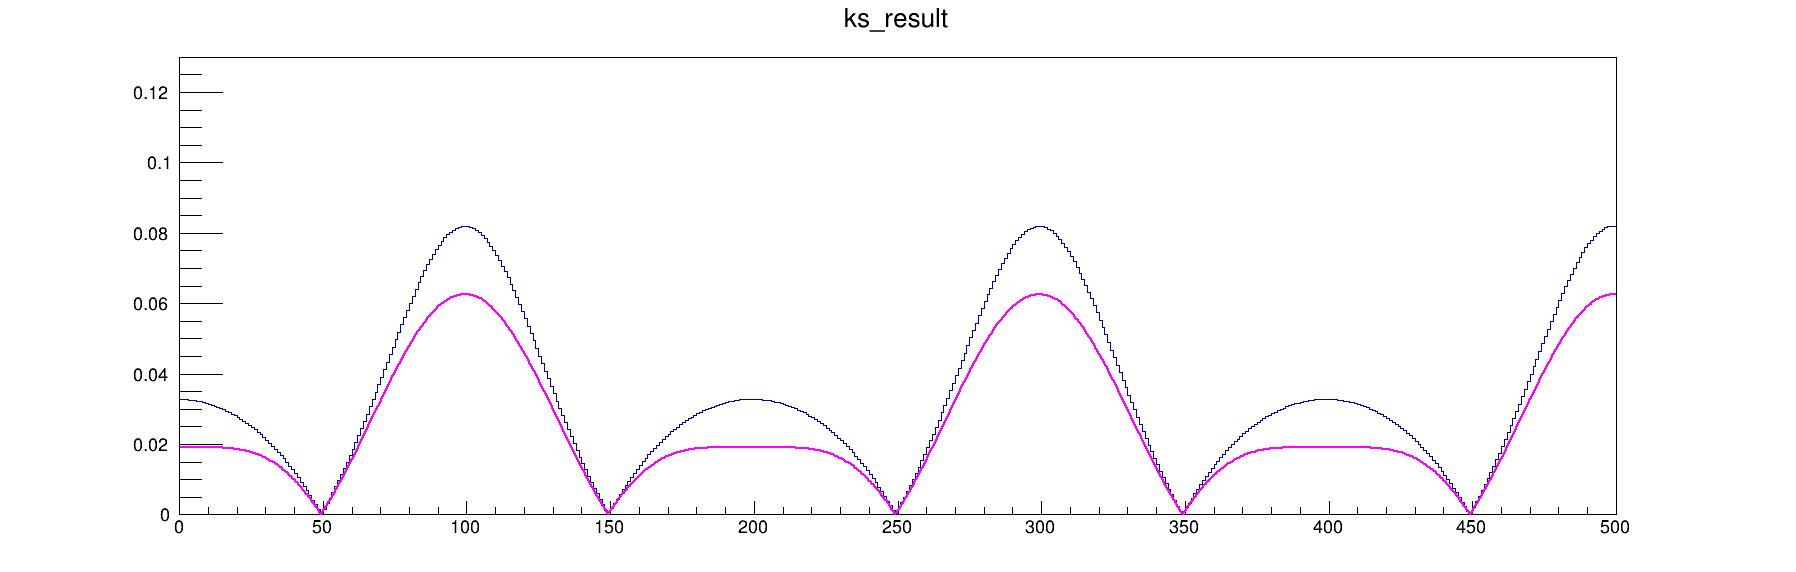

In [22]:
c = r.TCanvas("c","c",1800,600)
ks_result.Draw()
ks_result.GetYaxis().SetRangeUser(0,0.13)
ks_result.GetXaxis().SetRangeUser(0,500)
func4.SetParameters(0.04,0.03143,4.731,0,0.021,0.021,0.018,0.015,0.00615,0.01,0.01)
func4.Draw("SAME")
c.Draw()

Starting fit 1
Toast Notification Sent
 FCN=3.28683e-05 FROM MINOS     STATUS=FAILURE      5040 CALLS      143890 TOTAL
                     EDM=9.65e-05    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{1a}       4.64176e-02   1.32866e-02  -2.60311e-08   3.27397e-02
   2  #omega       3.14478e-02   2.27147e-04  -1.89308e-08   1.79591e+00
   3  #phi_{1}     4.72796e+00   9.57780e-02   6.48621e-06  -5.25359e-03
   4  A_{0a}      -4.75738e-05   1.69762e-02  -1.61610e-07  -1.93349e-01
   5  A_{1b}       1.88691e-02   1.05669e-02  -1.86372e-06  -2.05381e-02
   6  A_{2a}       5.25836e-02   1.28833e-01   6.76366e-06   2.51467e-03
   7  A_{2b}       1.31129e-02   1.21053e-01  -8.76527e-06  -2.84613e-04
   8  A_{3a}       1.79590e-01   1.27608e-01  -5.77577e-06   2.18687e-03
   9  A_{3b}       3.64405e-02   1.39612e-01   3.75618e-05  -3.66026e-03
  

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


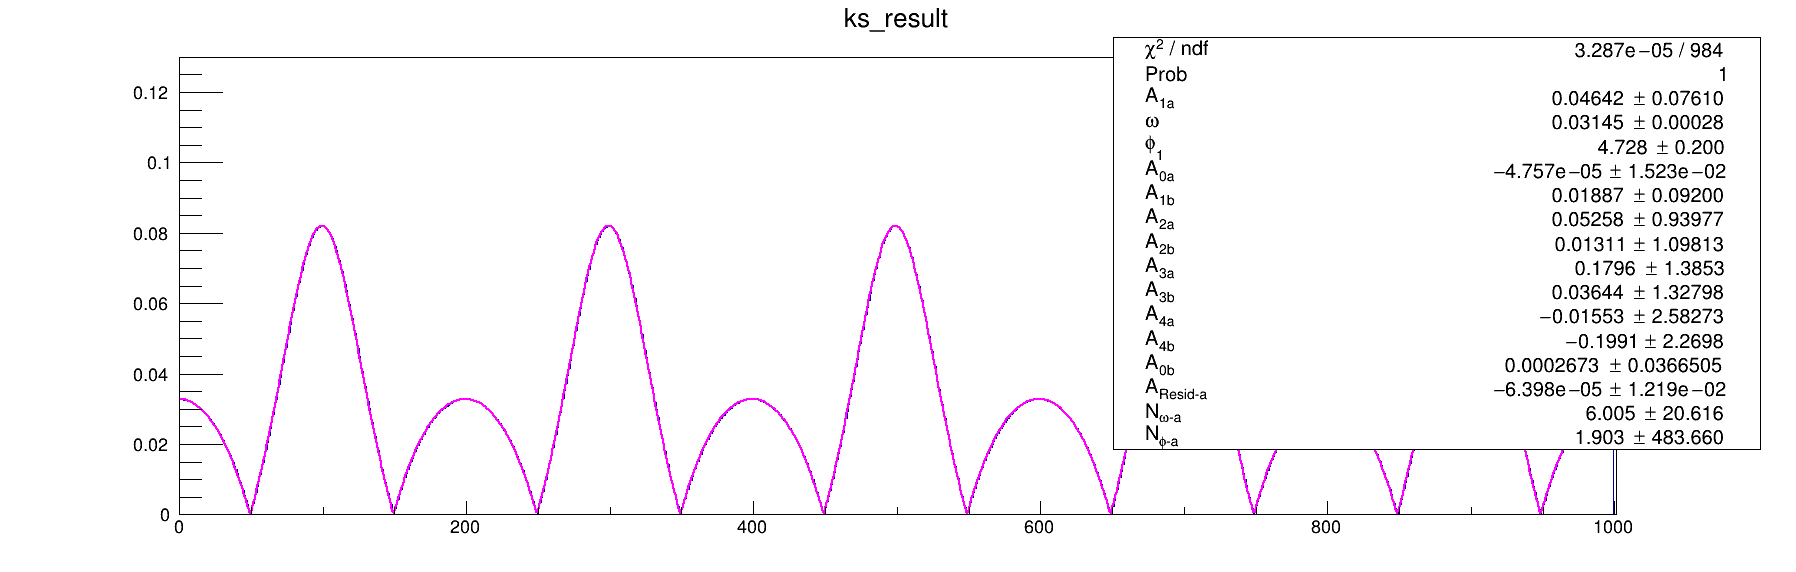

In [23]:
c = r.TCanvas("c","c",1800,600)
ks_result.Draw()
ks_result.GetXaxis().SetRangeUser(0,5000)
for i in range(1):
    print("Starting fit", i+1)
    ks_result.Fit("sinsquare","REMB")
#func3.Draw("SAME")
toast("Fit complete")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


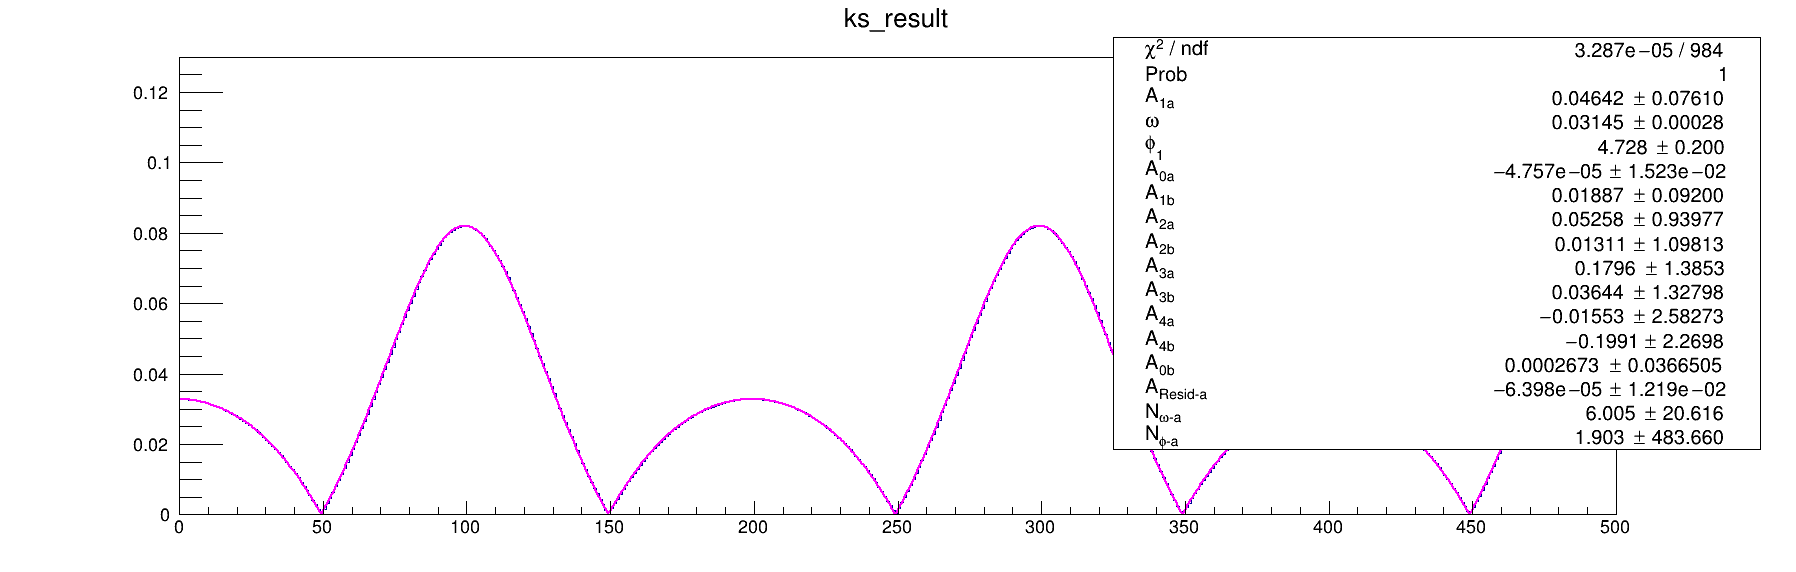

In [24]:
c = r.TCanvas("c","c",1800,600)
ks_result.Draw()
ks_result.GetXaxis().SetRangeUser(0,500)
c.Draw()

---

Creating new Ratio Plot


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


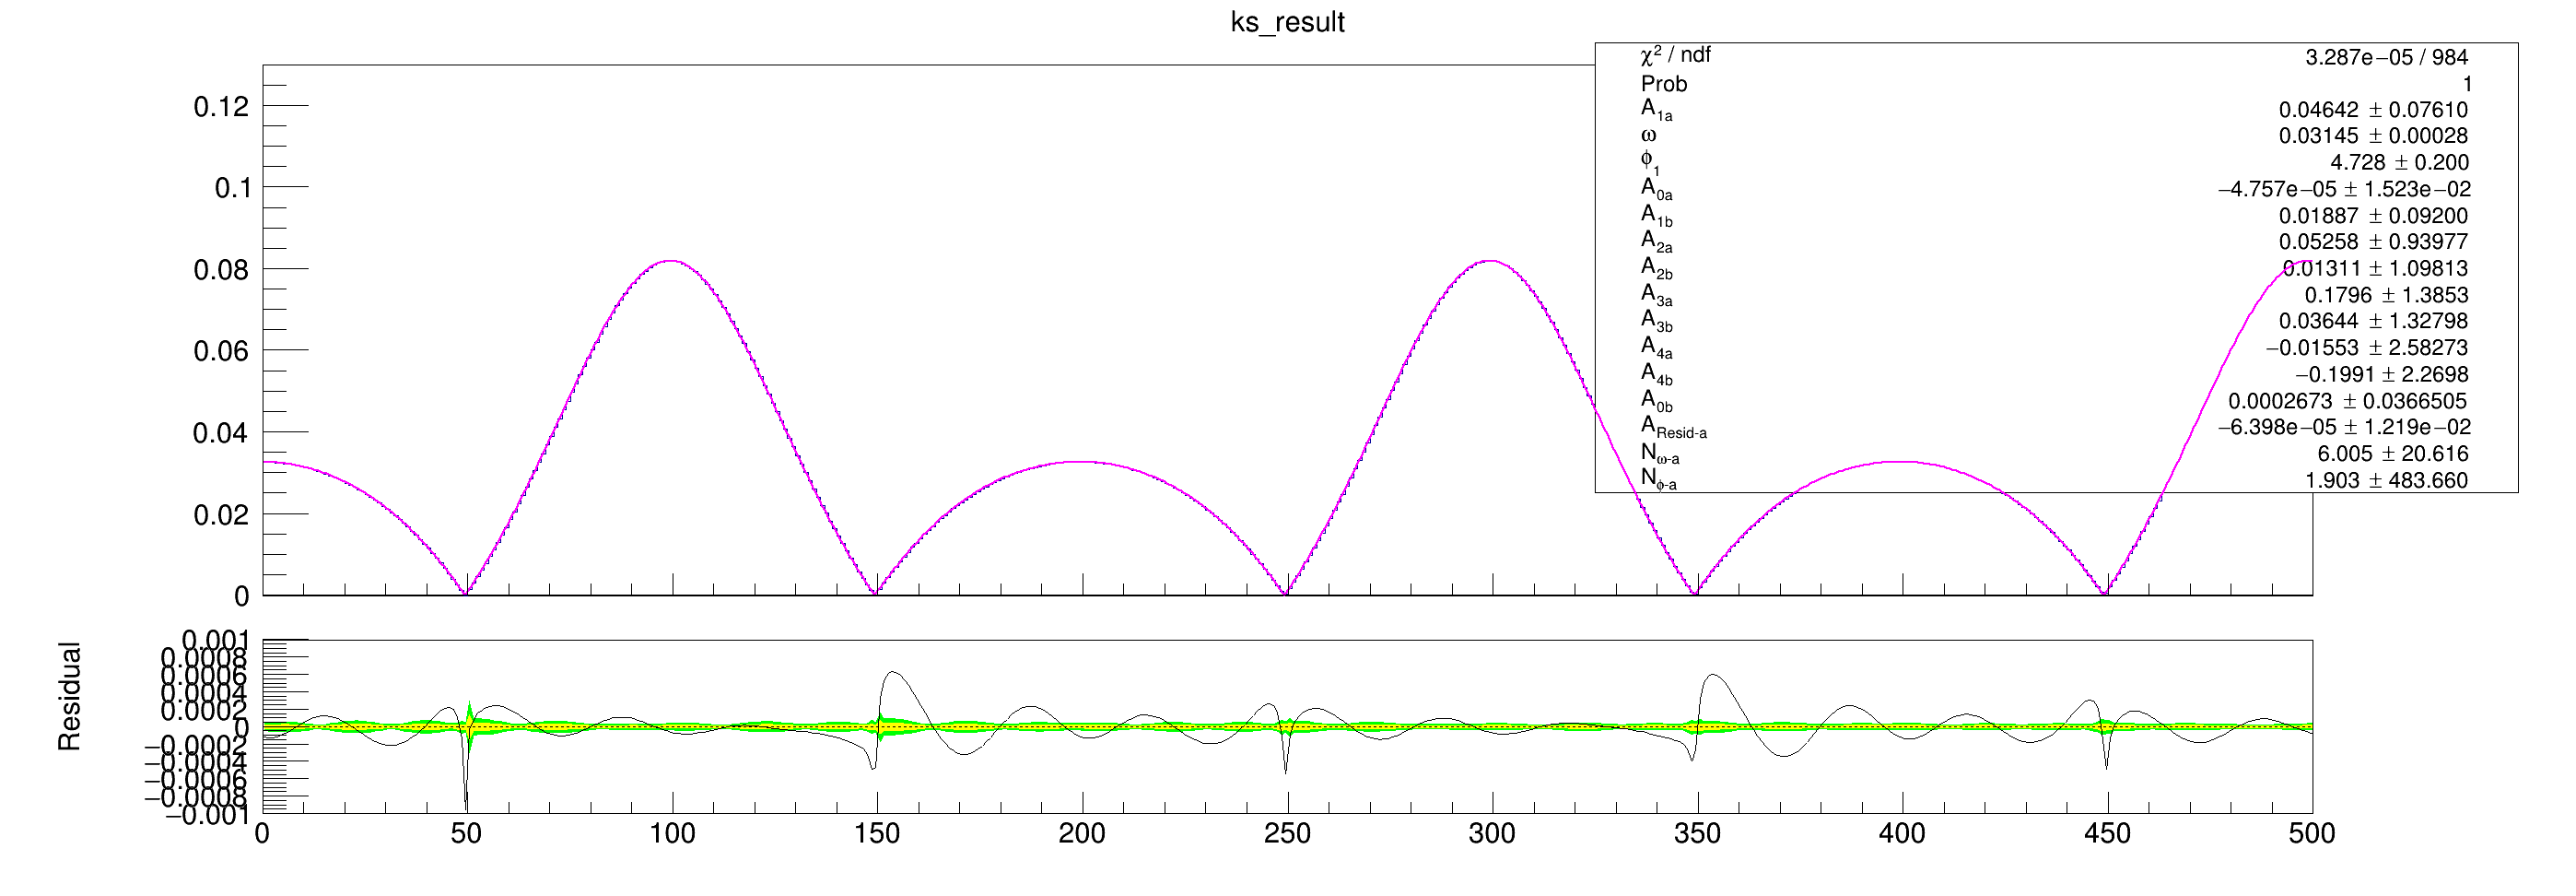

In [25]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas("c","c",2800,1000)
ks_result.Draw()
ks_result.GetXaxis().SetRangeUser(0,500)

c3.Draw()

try:
    rp1.Delete()
except:
    print("Creating new Ratio Plot")

try:
    rp1 = r.TRatioPlot(ks_result)
    rp1.Draw()
    rp1.GetLowerRefYaxis().SetTitle("Residual")
    rp1.GetLowerRefYaxis().SetRangeUser(-0.001,0.001)
except:
    print("ERROR: Could not create TRatioPlot. Probably too many fit functions on one histogram.")

c3.Update()
c3.Draw()

---

### Lets get the residuals now

In [26]:
ks_resid = ks_result.Clone("ks_resid")
ks_resid.Reset()
ks_resid.SetTitle("Residuals")

ks_resid_vec = []

for i in range(len(ksvec)):
    resid = ks_result.GetBinContent(i) - func4.Eval(ks_result.GetBinCenter(i))
    ks_resid.SetBinContent(i, resid)
    ks_resid_vec.append(resid)

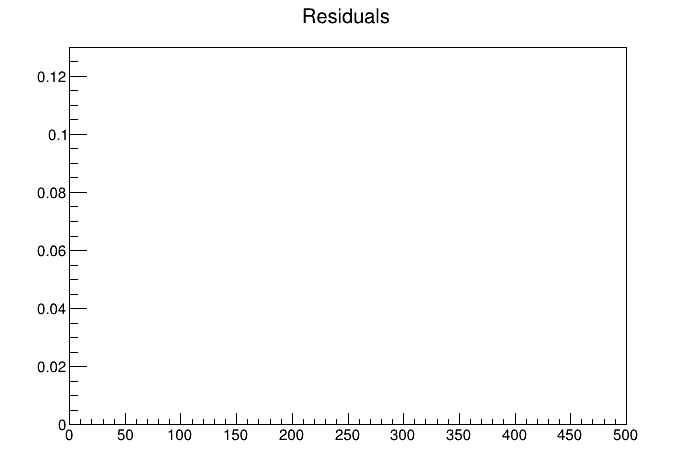

In [27]:
c = r.TCanvas()
ks_resid.SetLineColor(2)
ks_resid.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


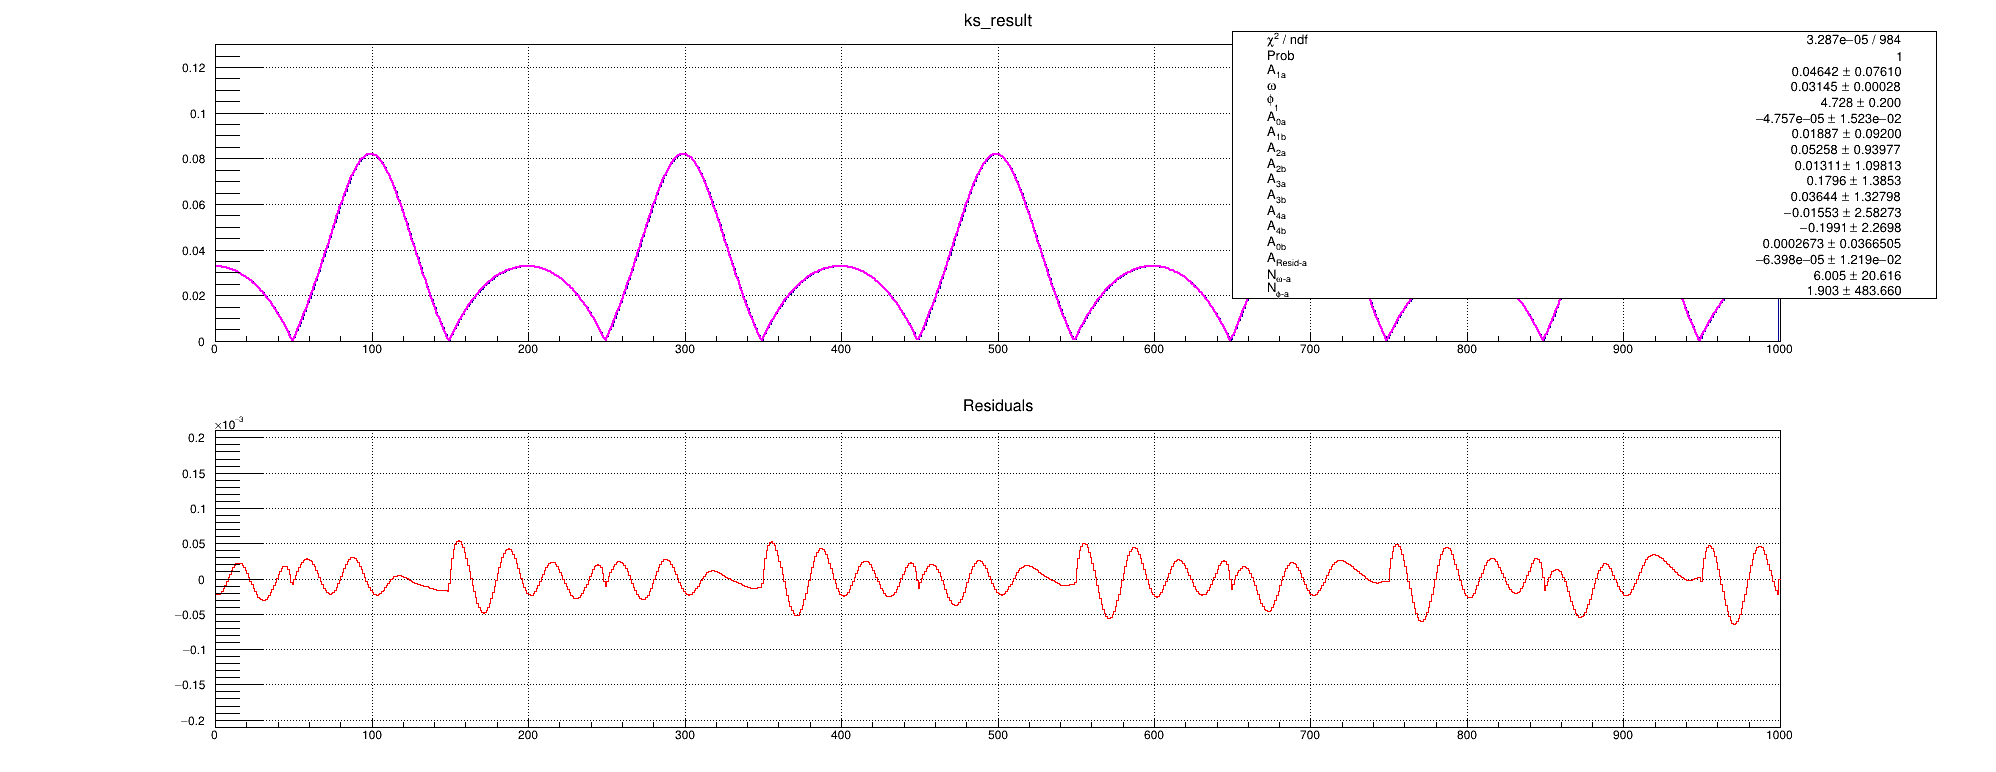

In [28]:
c = r.TCanvas("c","c",2000,800)
c.Divide(1,2)
c.cd(1)
ks_result.GetXaxis().SetRangeUser(0,1000)
ks_result.Draw()
r.gPad.SetGrid()

c.cd(2)
ks_resid.GetXaxis().SetRangeUser(0,1000)
ks_resid.GetYaxis().SetRangeUser(-0.00021,0.00021)
ks_resid.Draw()
r.gPad.SetGrid()
c.Draw()

In [29]:
fitresid = r.TF1("func1","[0]+[1]*TMath::Sin([4]*x + [3])*TMath::Sin([2]*x + [5])",0,1000)
fitresid.SetLineColor(7)
fitresid.SetNpx(10000)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


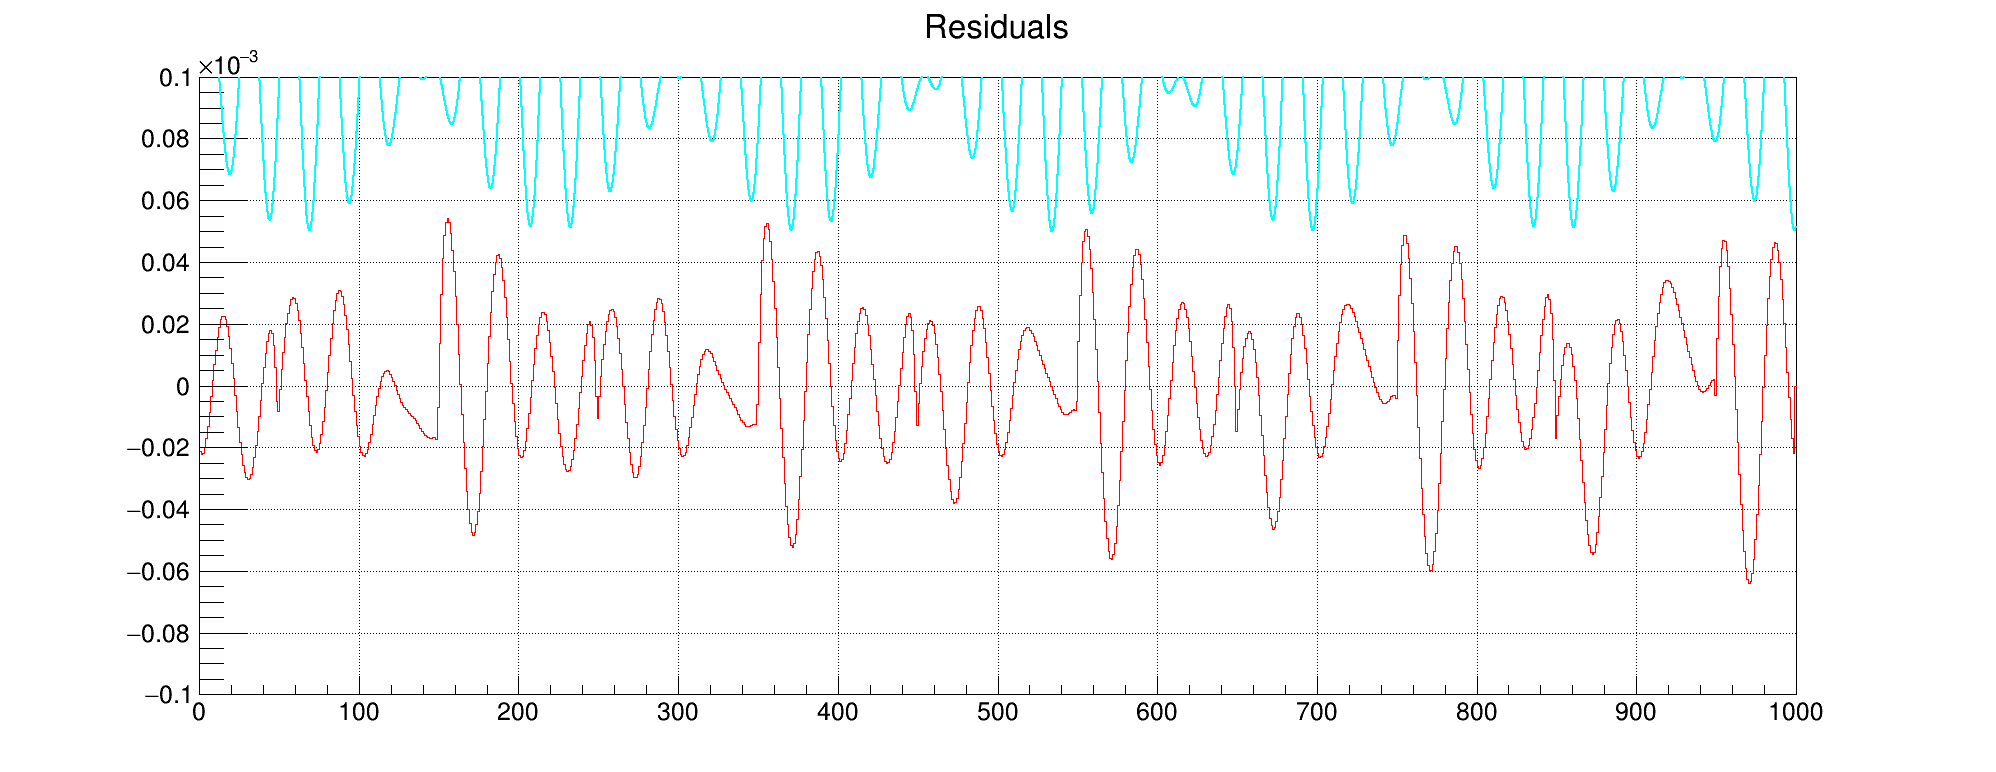

In [30]:
c = r.TCanvas("c","c",2000,800)

ks_resid.GetXaxis().SetRangeUser(0,1000)
ks_resid.GetYaxis().SetRangeUser(-0.0001,0.0001)
ks_resid.Draw()

fitresid.SetParameters(0.0001,0.00005,0.25,0.3,.02,0)
#fitresid.SetParLimits(1,0.001,1000000)
fitresid.Draw("SAME")
#ks_resid.Fit("func1","REMB")

r.gPad.SetGrid()
c.Draw()

 FCN=0.0190577 FROM MINOS     STATUS=FAILURE       937 CALLS        5042 TOTAL
                     EDM=4.56465e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.14859e-07   4.94153e-05   3.09412e-08  -4.13731e+01
   2  p1           1.35676e-06   1.68700e-04  -1.97581e-07  -6.89505e+00
   3  p2          -1.50837e-01   2.15949e-01  -3.89742e-06  -1.03532e-03
   4  p3           4.44053e+00   1.27438e+02  -1.11605e-02   8.78353e-06
   5  p4           1.55823e-02   2.23720e-01   1.72146e-05   8.91965e-04
   6  p5          -6.09125e+00   1.21423e+02   1.21423e+02  -5.66613e-08


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


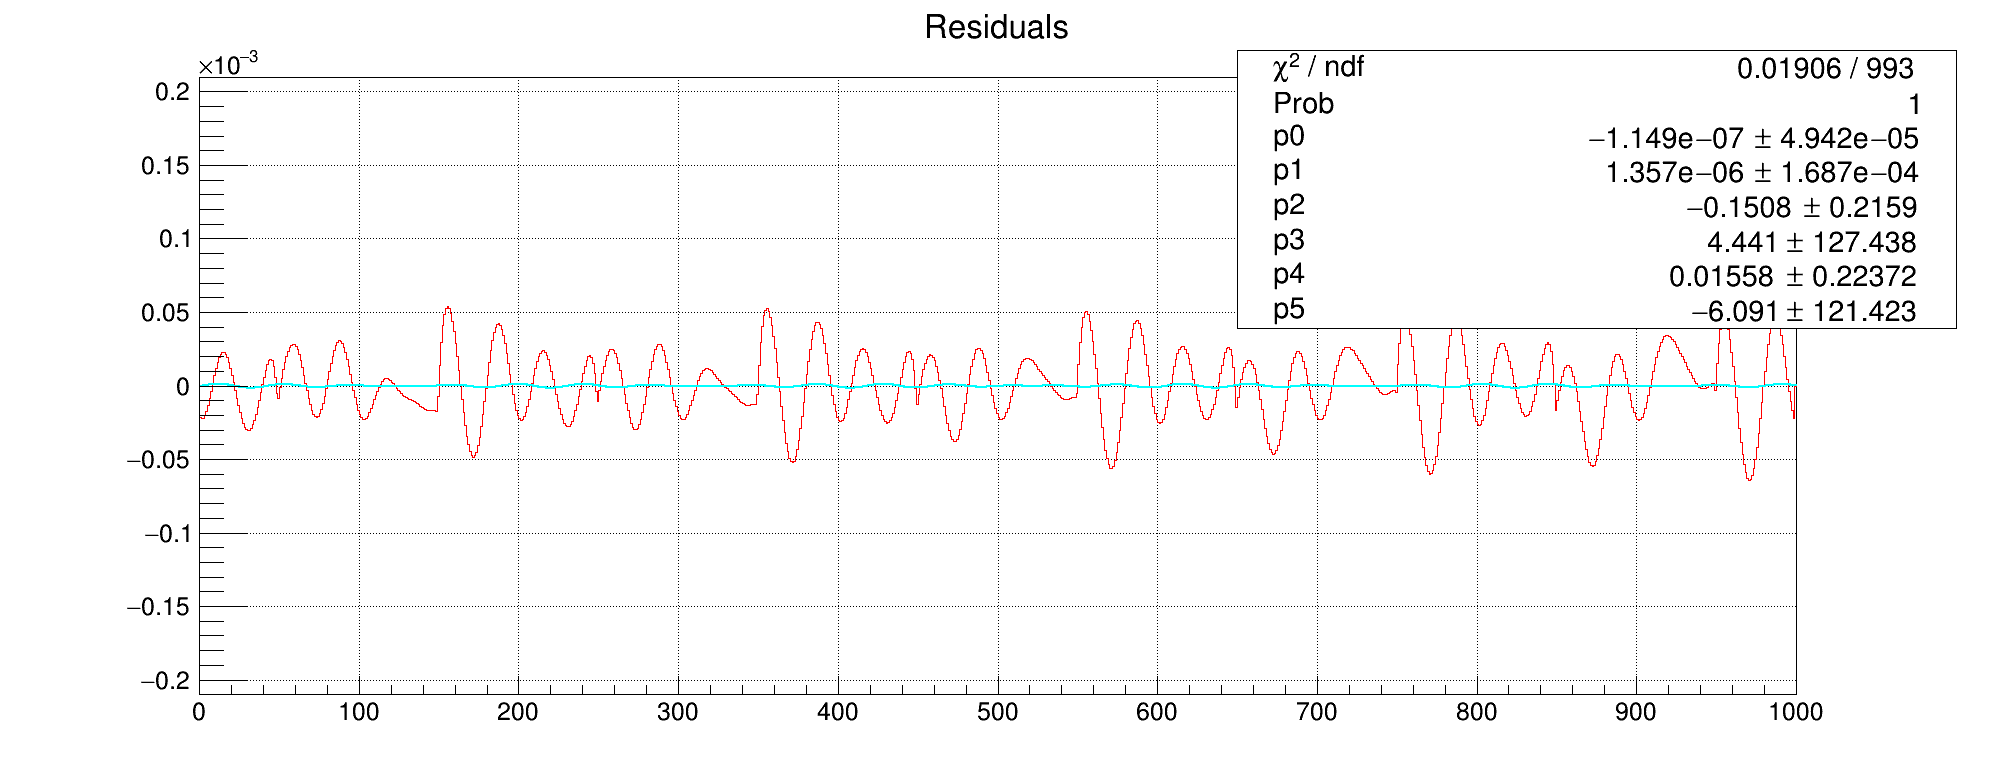

In [31]:
c = r.TCanvas("c","c",2000,800)
ks_resid.GetXaxis().SetRangeUser(0,1000)
ks_resid.GetYaxis().SetRangeUser(-0.00021,0.00021)
ks_resid.Draw()
ks_resid.Fit("func1","REMB")
r.gPad.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


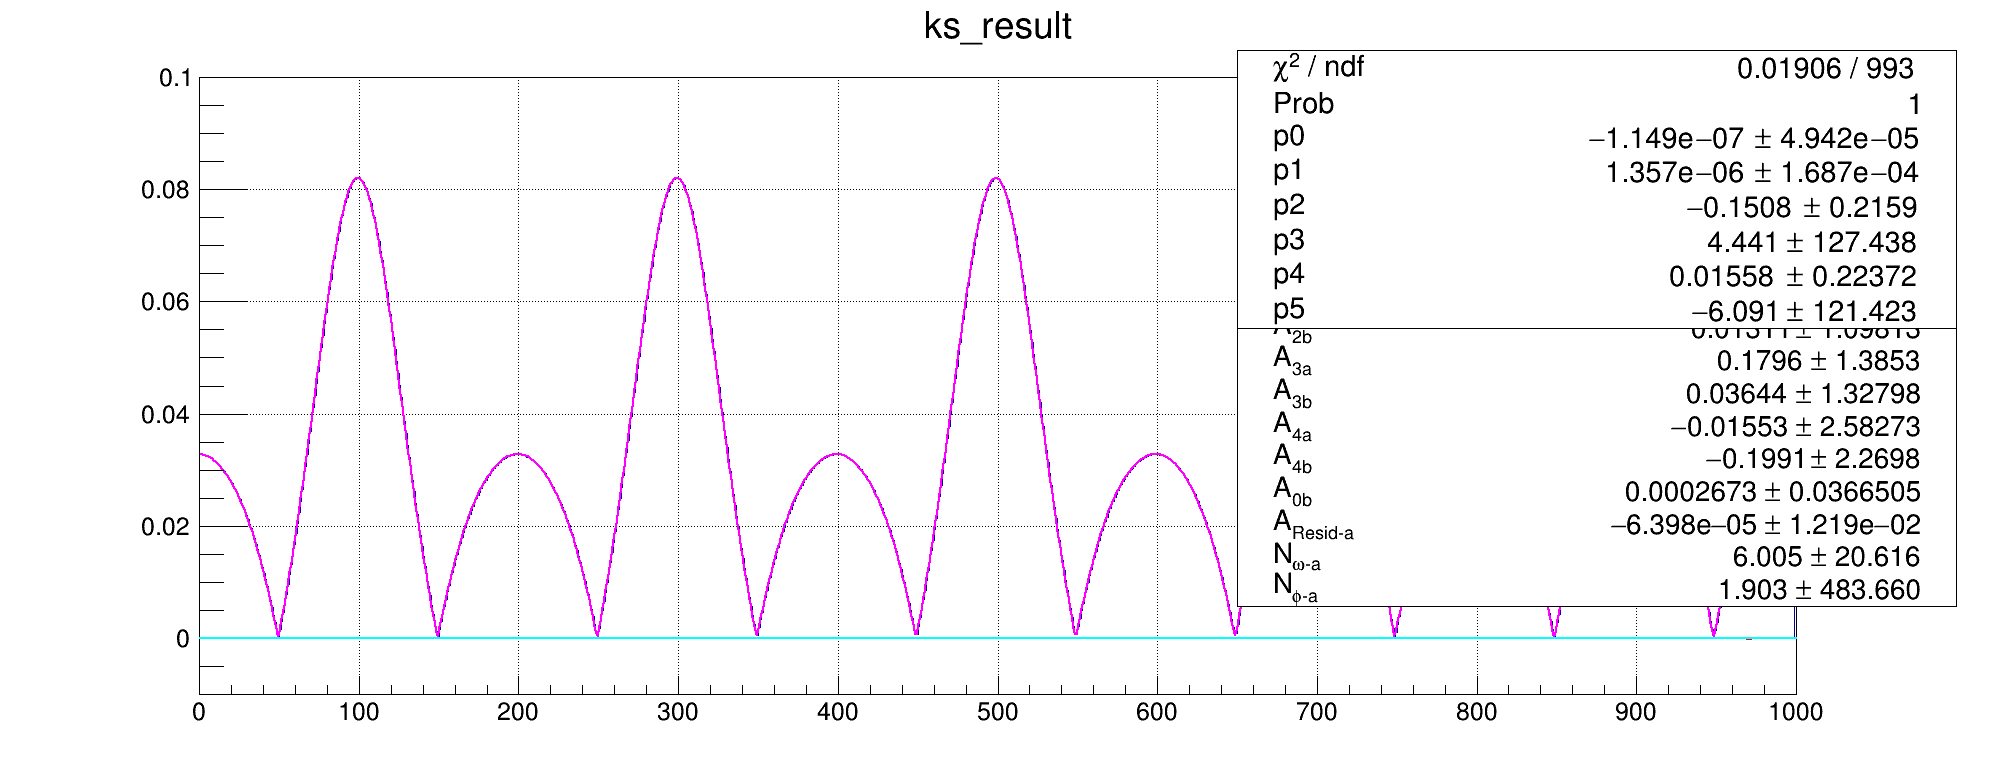

In [32]:
c = r.TCanvas("c","c",2000,800)
ks_result.GetXaxis().SetRangeUser(0,1000)
ks_result.GetYaxis().SetRangeUser(-0.01,0.1)
ks_result.Draw()
ks_resid.Draw("SAME")
r.gPad.SetGrid()
c.Draw()

---

### FFT of the full spectrum

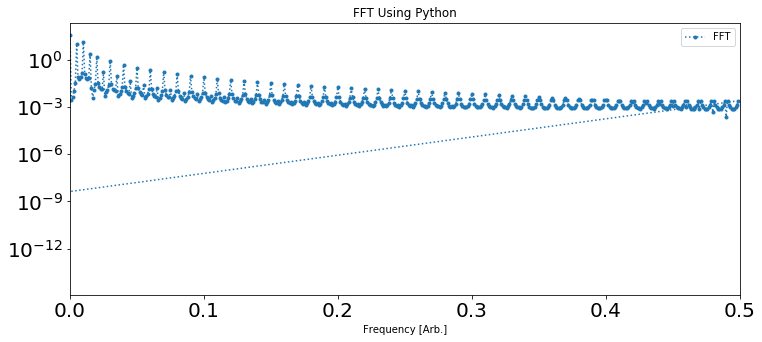

In [33]:
ding = np.fft.fft(np.array(ksvec))
times = [x for x in range(len(ksvec))]

n = len(ksvec)
#d = 1
d = (times[1] - times[0])

freq = np.fft.fftfreq(n, d)

fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x for x in freq],np.abs(ding),':.',label='FFT')
plt.title("FFT Using Python")
plt.xlabel("Frequency [Arb.]")
plt.xlim(0,1/2)# *10.**6)
plt.yscale("log")
plt.legend()
plt.show()

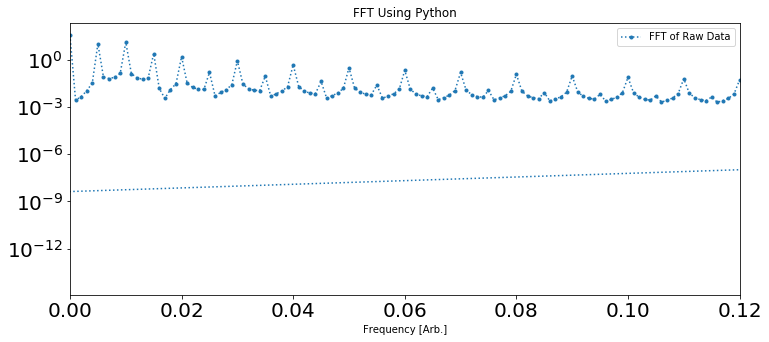

In [34]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x for x in freq],np.abs(ding),':.',label='FFT of Raw Data')
plt.title("FFT Using Python")
plt.xlabel("Frequency [Arb.]")
plt.xlim(0,0.12)# *10.**6)
plt.yscale("log")
plt.legend()
plt.show()

---

### And of the residual spectrum

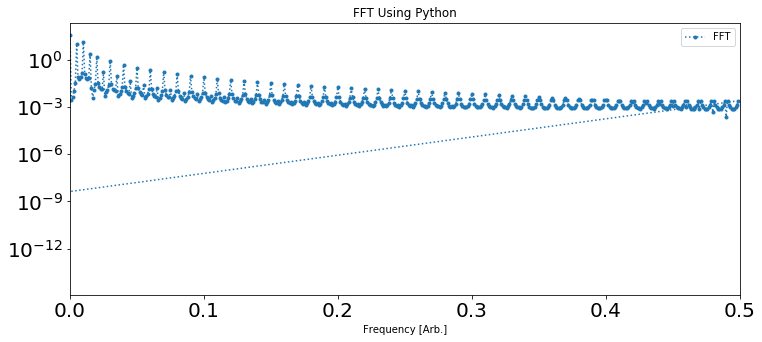

In [35]:
ding2 = np.fft.fft(np.array(ks_resid_vec))
times2 = [x for x in range(len(ks_resid_vec))]

n = len(ks_resid_vec)
#d = 1
d = (times[1] - times[0])

freq = np.fft.fftfreq(n, d)

fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x for x in freq],np.abs(ding),':.',label='FFT')
plt.title("FFT Using Python")
plt.xlabel("Frequency [Arb.]")
plt.xlim(0,1/2)# *10.**6)
plt.yscale("log")
plt.legend()
plt.show()

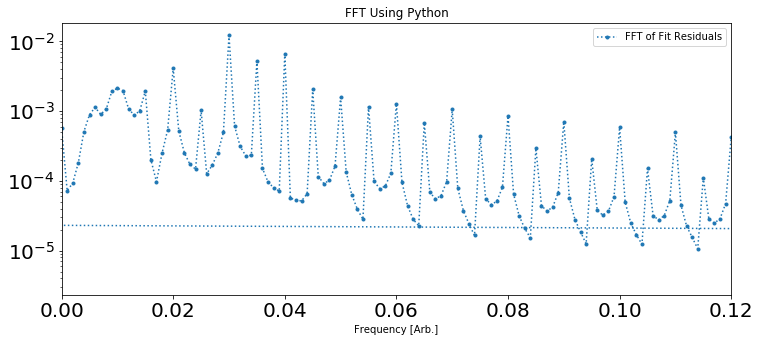

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x for x in freq],np.abs(ding2),':.',label='FFT of Fit Residuals')
plt.title("FFT Using Python")
plt.xlabel("Frequency [Arb.]")
plt.xlim(0,0.12)# *10.**6)
plt.yscale("log")
plt.legend()
plt.show()

---

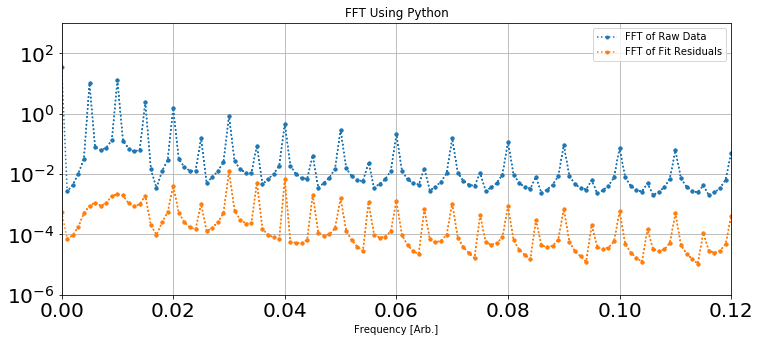

In [37]:
fig, ax = plt.subplots(figsize=(12, 5))

plt.plot([np.abs(x) for x in freq],np.abs(ding),'.:',label='FFT of Raw Data')
plt.plot([np.abs(x) for x in freq],np.abs(ding2),'.:',label='FFT of Fit Residuals')

plt.title("FFT Using Python")
plt.xlabel("Frequency [Arb.]")
plt.xlim(0,0.12)# *10.**6)
plt.ylim(0.000001,1000)# *10.**6)
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

In [38]:
print("hi")

hi
